In [20]:
import statsmodels.formula.api as sm
import pandas as pd

# import data
df = pd.read_csv('data_binarylogistic.csv', index_col = 0)
df.head()

,gmat,gpa,work_experience,admitted
1,580,2.7,4,0
2,660,3.3,6,1
3,740,3.3,5,1
4,590,1.7,4,0
5,660,4.0,4,1


In [26]:
# split data into training and testing
from sklearn.model_selection import train_test_split
y = df['admitted']
X = df[['gmat','gpa','work_experience']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
df_y_train=pd.DataFrame(data=y_train,columns=['admitted'])
df_train=pd.concat([X_train, df_y_train], axis=1)
df_y_test=pd.DataFrame(data=y_test,columns=['admitted'])
df_test=pd.concat([X_test, df_y_test], axis=1)

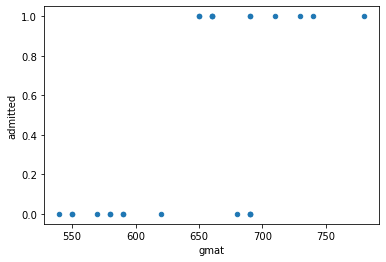

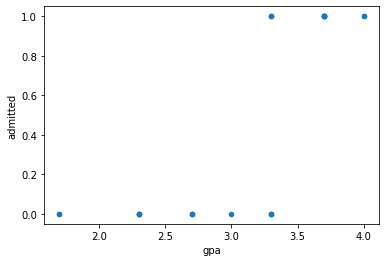

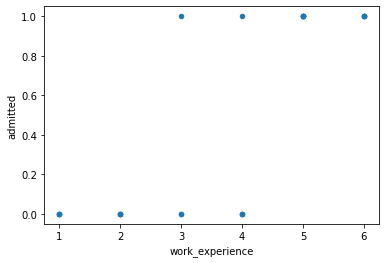

In [22]:
# Examine the data
ax=df_train.plot.scatter('gmat', 'admitted')
ax=df_train.plot.scatter('gpa', 'admitted')
ax=df_train.plot.scatter('work_experience', 'admitted')

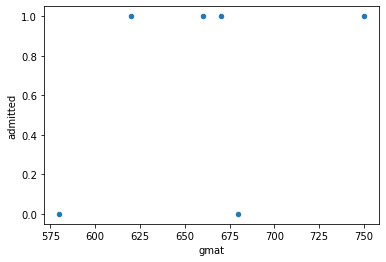

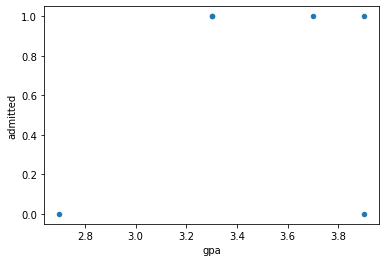

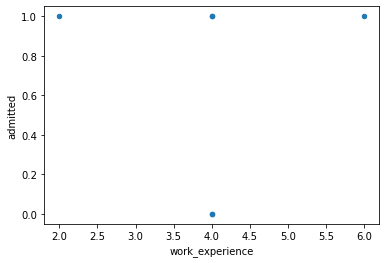

In [23]:
# Examine the data
ax=df_test.plot.scatter('gmat', 'admitted')
ax=df_test.plot.scatter('gpa', 'admitted')
ax=df_test.plot.scatter('work_experience', 'admitted')

In [11]:
# Build binary logistic model using one predicting variable (gpa)
log_reg = sm.logit(formula='admitted~gpa', data=df_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.308551
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   24
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.5457
Time:                        10:37:47   Log-Likelihood:                -7.4052
converged:                       True   LL-Null:                       -16.301
Covariance Type:            nonrobust   LLR p-value:                 2.466e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0048      7.546     -2.254      0.024     -31.794      -2.215
gpa            5.0347      2.

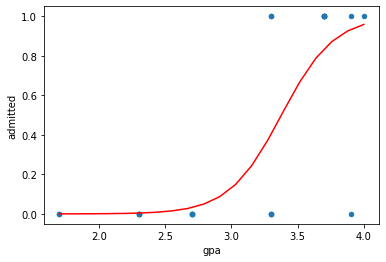

In [12]:
# Plot the logistic model
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm_api

value_min = df_train['gpa'].min()
value_max = df_train['gpa'].max()
pred_input = np.linspace(value_min, value_max, 20)

predictions=log_reg.predict(exog=dict(gpa=pred_input))
ax=df_train.plot.scatter('gpa', 'admitted')
plt.plot(pred_input,predictions,c='red')
plt.show()

In [17]:
# Accuracy analysis for train data
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(df_train['gpa'])
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(df_train['admitted'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(df_train['admitted'], predictions))
print('recall_score (sensitivity) = ', recall_score(df_train['admitted'], predictions)) # sensitivity
print('precision_score (specificity) = ', precision_score(df_train['admitted'], predictions)) # specificity

Confusion Matrix : 
 [[13  1]
 [ 3  7]]
Test accuracy =  0.8333333333333334
recall_score (sensitivity) =  0.7
precision_score (specificity) =  0.875


In [16]:
# Accuracy analysis for testing data
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(df_test['gpa'])
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(df_test['admitted'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(df_test['admitted'], predictions))
print('recall_score (sensitivity) = ', recall_score(df_test['admitted'], predictions)) # sensitivity
print('precision_score (specificity) = ', precision_score(df_test['admitted'], predictions)) # specificity

Confusion Matrix : 
 [[1 0]
 [2 3]]
Test accuracy =  0.6666666666666666
recall_score (sensitivity) =  0.6
precision_score (specificity) =  1.0


In [27]:
# Build binary logistic model using two variables(gpa, work_experience)


Optimization terminated successfully.
         Current function value: 0.155860
         Iterations 24
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   24
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.7751
Time:                        14:14:31   Log-Likelihood:                -3.7406
converged:                       True   LL-Null:                       -16.636
Covariance Type:            nonrobust   LLR p-value:                 2.511e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -394.3321   5.67e+07  -6.96e-06      1.000   -1.11e+08    1.11e+08
gpa          

In [29]:
# Accuracy analysis for train data
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)



Confusion Matrix : 
 [[11  1]
 [ 1 11]]
Test accuracy =  0.9166666666666666
recall_score (sensitivity) =  0.9166666666666666
precision_score (specificity) =  0.9166666666666666


In [30]:
# Accuracy analysis for testing data
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)


Confusion Matrix : 
 [[2 1]
 [0 3]]
Test accuracy =  0.8333333333333334
recall_score (sensitivity) =  1.0
precision_score (specificity) =  0.75
